In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 16 22:41:45 2021

@author: pmarc
Résolution Problème L13 - Formatif par Pierre-Marc Juneau, 17 avril 2021
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
import statsmodels.api as sm
import scipy.stats as sts
# statsmodels.formula.api import ols


In [2]:


donnee = pd.read_csv('../../04_Eda/13/Fichiers/DonneesBiometriquesv0r2.csv')
donnee.head()



,coude_dia (cm),poignet_dia (cm),genou_dia (cm),cheville_dia (cm),épaule_tour (cm),pec_tour (cm),taille_tour (cm),abdomen_tour (cm),hanche_tour (cm),bicept_tour (cm),avantbras_tour (cm),genou_tour (cm),cheville_tour (cm),poignet_tour (cm),Âge,Poids (kg),Grandeur (cm),Genre
0,13.1,10.4,18.8,14.1,106.2,89.5,71.5,74.5,93.5,32.5,26.0,34.5,23.5,16.5,21,65.6,174.0,Homme
1,14.0,11.8,20.6,15.1,110.5,97.0,79.0,86.5,94.8,34.4,28.0,36.5,24.5,17.0,23,71.8,175.3,Homme
2,13.9,10.9,19.7,14.1,115.1,97.5,83.2,82.9,95.0,33.4,28.8,37.0,21.9,16.9,28,80.7,193.5,Homme
3,13.9,11.2,20.9,15.0,104.5,97.0,77.8,78.8,94.0,31.0,26.2,37.0,23.0,16.6,23,72.6,186.5,Homme
4,15.2,11.6,20.7,14.9,107.5,97.5,80.0,82.5,98.5,32.0,28.4,37.7,24.4,18.0,22,78.8,187.2,Homme


/tmp/ipykernel_214226/715505418.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop({'Genre'},1)


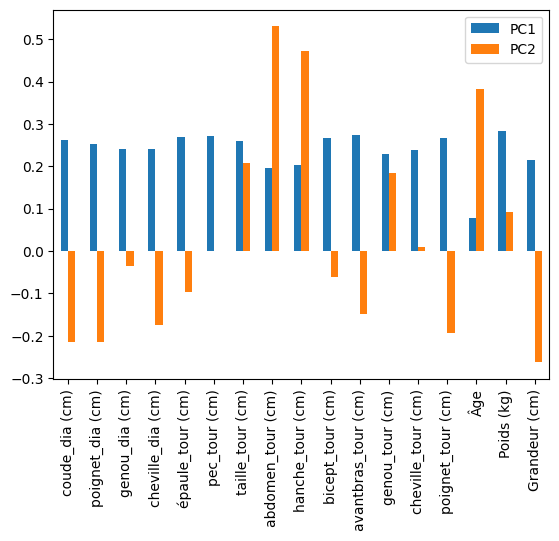

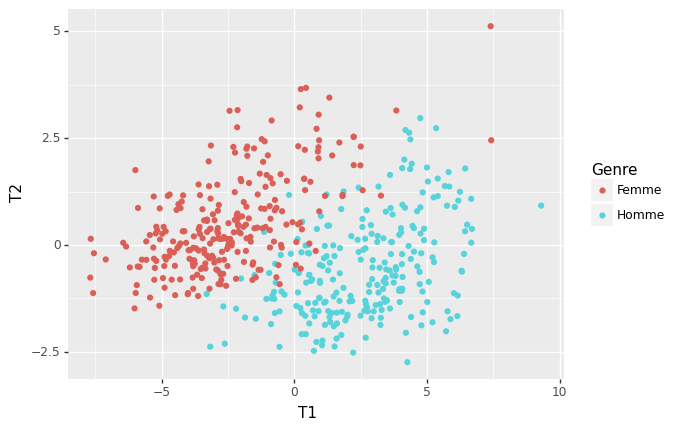

In [3]:

stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)


"Préparation des matrices"

X=donnee
X=X.drop({'Genre'},1)
Yclass=donnee['Genre']

MatriceR=X.corr()


"Stardardisation"

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
Xstand = scalerX.fit_transform(X.values)
Xstand=pd.DataFrame(Xstand)
Xstand.columns=X.columns

"PCA"

from sklearn.decomposition import PCA
a=2
pca = PCA(n_components=a)
pca.fit(Xstand)
VarianceCapturee=pca.explained_variance_ratio_
X_pca_mean=pca.mean_
T=pca.transform(Xstand)
P=pca.components_

T1=np.dot((Xstand.values-X_pca_mean),P[0,:])
T2=np.dot((Xstand.values-X_pca_mean),P[1,:])
Xest=pca.inverse_transform(T)


TPanda=pd.DataFrame(T)
TPanda.index=X.index
TPanda.columns=['T1','T2']
T_resultats=pd.concat([TPanda,Yclass],axis=1)

PPanda=pd.DataFrame(P.T)
PPanda.index=X.columns
PPanda.columns=['PC1','PC2']

PPanda.plot.bar()

import plotnine as p9
graph = p9.ggplot(data=T_resultats,
           mapping=p9.aes(x='T1', y='T2', color='Genre'))
print(graph + p9.geom_point())
